# Diabetes Prediction Model

#### In this notebook I have used the Diabetes data from [here](https://www.kaggle.com/johndasilva/diabetes). 
This is a classification problem

In [1]:
#Import the libraties for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import libraries for model creation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost 
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle



## Read the data from the csv file and store in df dataframe

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#This is the Predictor Variable. Let's check the class ratio.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Get the rows and columns
df.shape

(768, 9)

### Lets find if there is any missing value 

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### There are no missing values in the data

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Outcome')

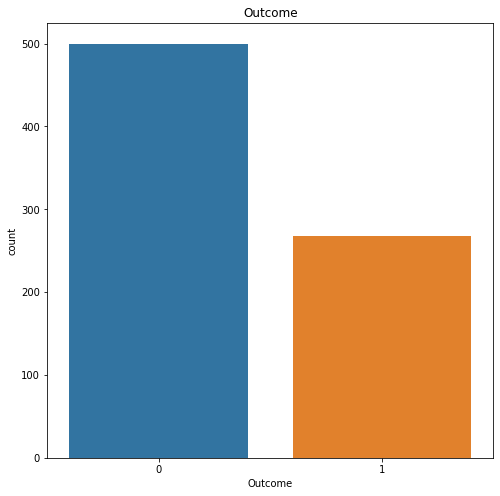

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(df['Outcome'])
plt.title('Outcome')

## Creating X and y variables for modelling

In [11]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [12]:
#Some of the values are 0 in the dataset which are equivalent to missing data
for features in X.columns:
    print(features, " has ", len(df[df[features]==0]), " 0 Values\n")

Pregnancies  has  111  0 Values

Glucose  has  5  0 Values

BloodPressure  has  35  0 Values

SkinThickness  has  227  0 Values

Insulin  has  374  0 Values

BMI  has  11  0 Values

DiabetesPedigreeFunction  has  0  0 Values

Age  has  0  0 Values



In [13]:
#Some of the values are 0 in the dataset. Replacing those values with the median for that particular feature
col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for features in col:
    print(features, " has ", len(df[df[features]==0]), "number of 0 Values\n")
    df[df[features]==0]=df[features].median()
    print("Updated ", features, " has ", len(df[df[features]==0]), "number of  0 Values\n")


Glucose  has  5 number of 0 Values

Updated  Glucose  has  0 number of  0 Values

BloodPressure  has  35 number of 0 Values

Updated  BloodPressure  has  0 number of  0 Values

SkinThickness  has  194 number of 0 Values

Updated  SkinThickness  has  0 number of  0 Values

Insulin  has  141 number of 0 Values

Updated  Insulin  has  0 number of  0 Values

BMI  has  1 number of 0 Values

Updated  BMI  has  0 number of  0 Values



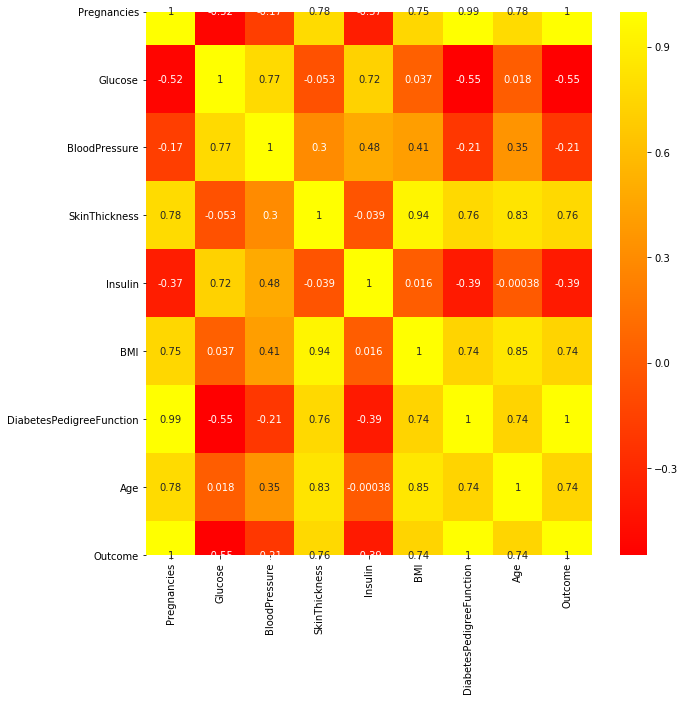

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='autumn')

#### From the above heatmap, we can see the correlation between 'BMI and SkinThickness=0.94','DiabetesPedigreeFunction and Pregnancies=0.9', 'BMI and Age=0.85' , 'Skin Thickness and Age=0.83'

### Model Prediction

### Splitting the data into train and test

In [15]:
X_trainm,X_testm,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=10)

<IPython.core.display.Javascript object>

In [16]:
X_train=np.matrix(X_trainm)

In [17]:
X_test=np.matrix(X_testm)

#### First try with Naive Bayes Classifier

In [18]:
nbmodel=GaussianNB()
nbmodel.fit(X_train,y_train)

GaussianNB()

In [19]:
predictionNB=nbmodel.predict(X_test)

### let's check the accuracy

In [20]:
print("Accuracy Score with Naive Bayes Model: ", metrics.accuracy_score(y_test,predictionNB))

Accuracy Score with Naive Bayes Model:  0.7229437229437229


In [21]:
print("Confusion Matrix with Naive Bayes Model: \n", metrics.confusion_matrix(y_test,predictionNB))

Confusion Matrix with Naive Bayes Model: 
 [[122  22]
 [ 42  45]]


In [22]:
print("Confustion Matrix with Naive Bayes Model: \n", metrics.confusion_matrix(y_test,predictionNB))

Confustion Matrix with Naive Bayes Model: 
 [[122  22]
 [ 42  45]]


In [23]:
print("Classification Report with Naive Bayes Model: \n", metrics.classification_report(y_test,predictionNB))

Classification Report with Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       144
           1       0.67      0.52      0.58        87

    accuracy                           0.72       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.72      0.71       231



ROC curve Naive Bayes Model: 


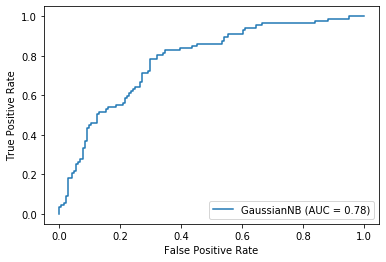

In [24]:
print("ROC curve Naive Bayes Model: \n", metrics.plot_roc_curve(nbmodel, X_test,y_test))

### Model with Random Forest

In [25]:
modelRF = RandomForestClassifier(random_state=10)
modelRF.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [26]:
predictionRF=modelRF.predict(X_test)

In [27]:
print("Accuracy Score with Random Forest Model: ", metrics.accuracy_score(y_test,predictionRF))

Accuracy Score with Random Forest Model:  0.7489177489177489


In [28]:
print("Confusion Matrix with Random Forest Model: \n", metrics.confusion_matrix(y_test,predictionRF))

Confusion Matrix with Random Forest Model: 
 [[128  16]
 [ 42  45]]


In [29]:
print("Classification Report with Random Forest Model: \n", metrics.classification_report(y_test,predictionRF))

Classification Report with Random Forest Model: 
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       144
           1       0.74      0.52      0.61        87

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



ROC curve Random Forest Model: 


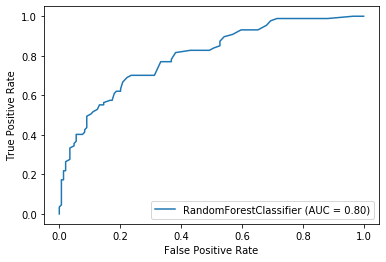

In [30]:
print("ROC curve Random Forest Model: \n", metrics.plot_roc_curve(modelRF, X_test,y_test))

### We can see that the Random Forest Model has better accuracy and F1 score than Naive Bayes model.

### Predicting with XGBoost

In [31]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [32]:
modelXG=xgboost.XGBClassifier()

In [33]:
#random_search=RandomizedSearchCV(modelXG,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [34]:
#random_search.fit(X_train,y_train)

In [35]:
#random_search.best_estimator_

In [36]:
modelXG=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=8,
              min_child_weight=3)

In [37]:
modelXG.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=8,
              min_child_weight=3)

In [38]:
predictXG=modelXG.predict(X_test)

In [39]:
score=cross_val_score(modelXG,X_train,y_train,cv=10)

In [40]:
score.mean()

0.7523060796645702

In [41]:
print("Accuracy Score with XGBoost Model : ", metrics.accuracy_score(y_test,predictXG))

Accuracy Score with XGBoost Model :  0.7489177489177489


In [42]:
print("Confusion Matrix with XGBoost Model: \n", metrics.confusion_matrix(y_test,predictXG))

Confusion Matrix with XGBoost Model: 
 [[125  19]
 [ 39  48]]


In [43]:
print("Classification Report with XGBoost Model: \n", metrics.classification_report(y_test,predictXG))

Classification Report with XGBoost Model: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       144
           1       0.72      0.55      0.62        87

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



ROC curve XGBoost Model: 


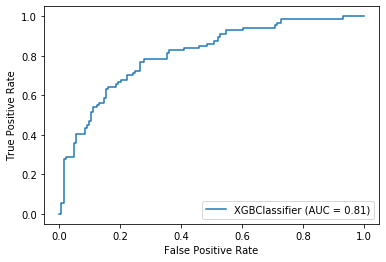

In [44]:
print("ROC curve XGBoost Model: \n", metrics.plot_roc_curve(modelXG, X_test,y_test))

## Let's try some more Parameter Tuning for XGBoost

In [45]:

## Hyper Parameter Optimization

params={
 "booster"           :['gbtree','gblinear'],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,1.5,2,5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [46]:
grid_search=GridSearchCV(modelXG,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [47]:
#grid_search.fit(X_train,y_train)

In [48]:
#grid_search.best_estimator_

In [49]:
modelXG=xgboost.XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [50]:
modelXG.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [51]:
predictXG=modelXG.predict(X_test)

In [52]:
print("Accuracy Score with XGBoost Model : ", metrics.accuracy_score(y_test,predictXG))

Accuracy Score with XGBoost Model :  0.7489177489177489


### Let's try to achieve better accuracy by dropping a feature "Skin Thickness" as it is correlated with BMI and Age

In [53]:
X_trainm.drop("SkinThickness",axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
X_testm.drop("SkinThickness",axis=1, inplace=True)

In [55]:
X_train=np.matrix(X_trainm)
X_test=np.matrix(X_testm)

In [56]:
modelXGnew=xgboost.XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [57]:
modelXGnew.fit(np.asmatrix(X_train),y_train)

XGBClassifier(colsample_bytree=0.5, gamma=5, learning_rate=0.25, max_depth=6)

In [58]:
predictXGnew=modelXGnew.predict(np.asmatrix(X_test))

In [59]:
print("Accuracy Score with XGBoost Model : ", metrics.accuracy_score(y_test,predictXGnew))

Accuracy Score with XGBoost Model :  0.7575757575757576


In [60]:
print("Confusion Matrix with XGBoost Model: \n", metrics.confusion_matrix(y_test,predictXGnew))

Confusion Matrix with XGBoost Model: 
 [[134  10]
 [ 46  41]]


In [61]:
print("Classification Report with XGBoost Model: \n", metrics.classification_report(y_test,predictXGnew))

Classification Report with XGBoost Model: 
               precision    recall  f1-score   support

           0       0.74      0.93      0.83       144
           1       0.80      0.47      0.59        87

    accuracy                           0.76       231
   macro avg       0.77      0.70      0.71       231
weighted avg       0.77      0.76      0.74       231



ROC curve XGBoost Model: 


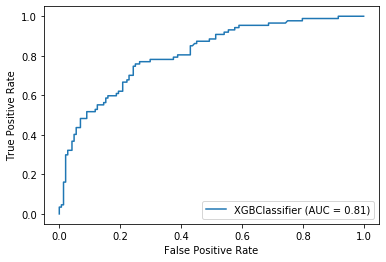

In [62]:
print("ROC curve XGBoost Model: \n", metrics.plot_roc_curve(modelXGnew, X_test,y_test))

In [63]:
modelRFnew = RandomForestClassifier()
modelRFnew.fit(np.asmatrix(X_train),y_train)

RandomForestClassifier()

In [64]:
predictionRFnew=modelRFnew.predict(X_test)

In [65]:
print("Accuracy Score with Random Forest Model New: ", metrics.accuracy_score(y_test,predictionRFnew))

Accuracy Score with Random Forest Model New:  0.7835497835497836


In [66]:
print("Confusion Matrix with Random Forest Model: \n", metrics.confusion_matrix(y_test,predictionRFnew))

Confusion Matrix with Random Forest Model: 
 [[132  12]
 [ 38  49]]


In [67]:
print("Classification Report with Random Forest Model: \n", metrics.classification_report(y_test,predictionRFnew))

Classification Report with Random Forest Model: 
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       144
           1       0.80      0.56      0.66        87

    accuracy                           0.78       231
   macro avg       0.79      0.74      0.75       231
weighted avg       0.79      0.78      0.77       231



ROC curve Random Forest Model: 


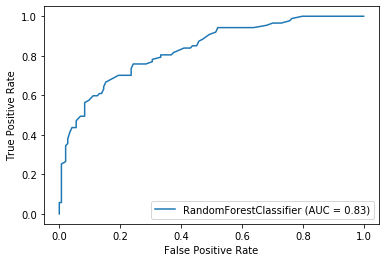

In [68]:
print("ROC curve Random Forest Model: \n", metrics.plot_roc_curve(modelRFnew, X_test,y_test))

In [69]:
#modelXGnew.fit(np.asmatrix(X),y)

In [70]:
pickle.dump(modelXGnew, open('model.pkl', 'wb'))

In [71]:
modelXGnew.feature_importances_

array([0.16314265, 0.28086767, 0.05941242, 0.09288973, 0.11746729,
       0.08036587, 0.20585442], dtype=float32)

In [72]:
modelXGnew.score(np.asmatrix(X_test),y_test)

0.7575757575757576

In [73]:
joblib.dump(modelXG, "model.pkl")


NameError: name 'joblib' is not defined

In [ ]:
classifer = joblib.load("model.pkl")


In [ ]:
cols_when_model_builds = modelXG.get_booster().feature_names
cols_when_model_builds

In [ ]:
df = pd.DataFrame([cols_when_model_builds])


In [ ]:
# Create new observation
new_observation = [[10,101,76,180,32.9,0.171,63]]

# Predict observation's class
print(modelXGnew.predict(new_observation))



In [ ]:

new_observation = [[10,115,70,96,34.6,0.529,60]]
print(modelXGnew.predict(new_observation))